## Parse matam logs for each revisions

In [82]:
import os
from collections import defaultdict

results_dir = "/home/ubuntu/test_matam/"

revisions_path = [os.path.join(results_dir,d) for d in os.listdir(results_dir) if os.path.isdir( os.path.join(results_dir, d))]
revisions_path = [d for d in revisions_path if os.path.basename(d) not in ['matam', 'db', '.ipynb_checkpoints']]

def list_logfiles(directory):
    logs = [ os.path.join( directory,f) for f in os.listdir( directory ) if os.path.isfile(os.path.join(directory, f))]
    return sorted(logs)

def get_stats(f):
    """
    extract statistic from matam log file & more precisly from the last 8 cols the one line stats:
    ('seq_nb', 'seq_min_size', 'seq_max_size', 'seq_avg_size', 'seq_total_size', 'error_rate', 'error_rate2', 'ref_coverage')
    """
    res_handler = open(f, 'r')
    lines = res_handler.readlines()
    for i, line in enumerate(lines):
        if 'One-line stats' in line: break    
    stats = lines[i+1].strip()

    stats = stats.split('\t')
    stats = stats[-8:]

    
    
    #stats = stats[:4] + stats[5:]
    formated_stats = []
    for s in stats:
        s = s.strip()
        if '%' in s:
            s = s.replace('%','')
        if '.' in s:
            s = float(s)
        else: s = int(s)
        formated_stats.append(s)
    assert len(formated_stats) == 8
    res_handler.close()
    return formated_stats

revisions_stats = defaultdict(list)

for revision_path in revisions_path:
    revision_name = os.path.basename(revision_path)
    for logfile in list_logfiles(revision_path):
        stats = None
        try:
            stats = get_stats(logfile)
        except IndexError: pass
        if stats is None:
            print('Ignoring:%s' % logfile)
            continue
        revisions_stats[revision_name].append(stats)

#revisions_stats


## Testing the testing code
#t1=t2=t3-20
#revisions_stats = {'t1' : [[23, 550, 1526, 1239.09, 28499, 0.04, 0.04, 91.96],
#    [23, 550, 1526, 1239.09, 28499, 0.04, 0.04, 91.96],
#    [25, 550, 1530, 1167.8, 29195, 0.09, 0.03, 92.18],
#    [23, 550, 1526, 1239.09, 28499, 0.04, 0.04, 91.96],
#    [20, 847, 1526, 1365.4, 27308, 0.02, 0.02, 90.69]],
# 't2' : [[23, 550, 1526, 1239.09, 28499, 0.04, 0.04, 91.96],
#    [23, 550, 1526, 1239.09, 28499, 0.04, 0.04, 91.96],
#    [25, 550, 1530, 1167.8, 29195, 0.09, 0.03, 92.18],
#    [23, 550, 1526, 1239.09, 28499, 0.04, 0.04, 91.96],
#    [20, 847, 1526, 1365.4, 27308, 0.02, 0.02, 90.69]],
# 't3' : [[43, 570, 1546, 1259.09, 28519, 20.04, 20.04, 111.96],
#    [43, 570, 1546, 1259.09, 28519, 20.04, 20.04, 111.96],
#    [45, 570, 1550, 1187.8, 29215, 20.09, 20.03, 112.18],
#    [43, 570, 1546, 1259.09, 28519, 20.04, 20.04, 111.96],
#    [40, 867, 1546, 1385.4, 27328, 20.02, 20.02, 110.69]]
#}

## Build a dataframe per revision

In [83]:
import numpy as np
import pandas as pd


categories = ('seq_nb', 'seq_min_size', 'seq_max_size', 'seq_avg_size', 'seq_total_size', 'error_rate', 'error_rate2', 'ref_coverage')

revisions_df = {}
for revision in revisions_stats.keys():
    df = pd.DataFrame(revisions_stats[revision],columns=categories)
    revisions_df[revision] = df

#revisions_df

## Plot the results

seq_nb


,28d66fb,v0.9.7,v0.9.8,v1.0.0,v1.1.0,v1.2.0,v1.2.1,v1.3.0,v1.4.0,v1.5.3,v1.6.0
count,100.000000,99.000000,100.000000,100.000000,100.00000,100.000000,100.000000,99.000000,100.000000,100.000000,100.000000
mean,23.350000,23.656566,22.940000,22.860000,22.55000,22.760000,22.770000,23.343434,23.370000,23.390000,23.370000
std,1.085953,1.294901,1.023166,1.378185,1.27426,1.240072,1.285938,1.221922,1.134002,1.062634,1.106957
min,21.000000,21.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,21.000000,21.000000,21.000000
25%,23.000000,23.000000,22.000000,22.000000,22.00000,22.000000,22.000000,23.000000,23.000000,23.000000,22.000000
50%,23.000000,24.000000,23.000000,23.000000,23.00000,23.000000,23.000000,23.000000,23.500000,23.000000,24.000000
75%,24.000000,25.000000,24.000000,24.000000,23.00000,23.000000,23.000000,24.000000,24.000000,24.000000,24.000000
max,26.000000,25.000000,25.000000,26.000000,26.00000,25.000000,25.000000,27.000000,26.000000,26.000000,26.000000


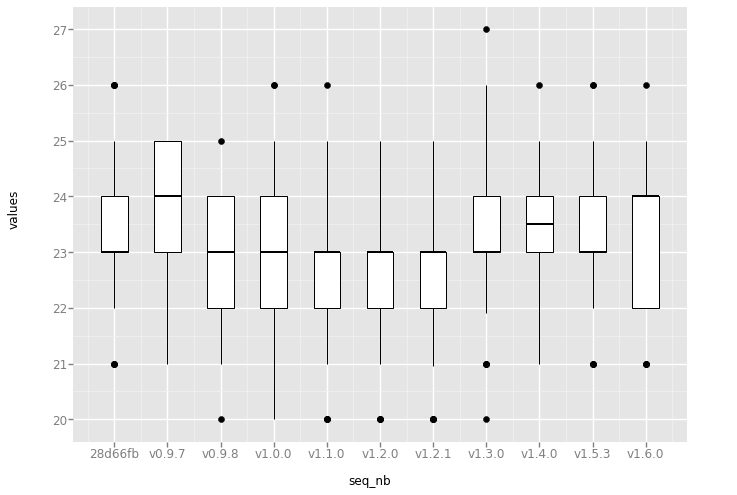

seq_min_size


,28d66fb,v0.9.7,v0.9.8,v1.0.0,v1.1.0,v1.2.0,v1.2.1,v1.3.0,v1.4.0,v1.5.3,v1.6.0
count,100.000000,99.000000,100.000000,100.00000,100.000000,100.000000,100.00000,99.000000,100.000000,100.000000,100.000000
mean,553.260000,539.070707,560.230000,559.62000,554.820000,558.390000,558.71000,554.707071,555.130000,553.180000,556.000000
std,28.903748,8.937712,38.085723,37.39113,32.600855,37.259639,42.76747,30.748902,28.406378,26.786617,32.424271
min,537.000000,505.000000,535.000000,500.00000,504.000000,500.000000,501.00000,534.000000,529.000000,535.000000,505.000000
25%,537.000000,533.000000,547.000000,550.00000,546.000000,546.000000,550.00000,537.000000,550.000000,544.500000,546.000000
50%,550.000000,533.000000,550.000000,550.00000,550.000000,550.000000,550.00000,550.000000,550.000000,550.000000,550.000000
75%,550.000000,550.000000,550.000000,550.00000,550.000000,550.000000,550.00000,550.000000,550.000000,550.000000,550.000000
max,656.000000,550.000000,701.000000,676.00000,676.000000,676.000000,847.00000,656.000000,656.000000,656.000000,656.000000


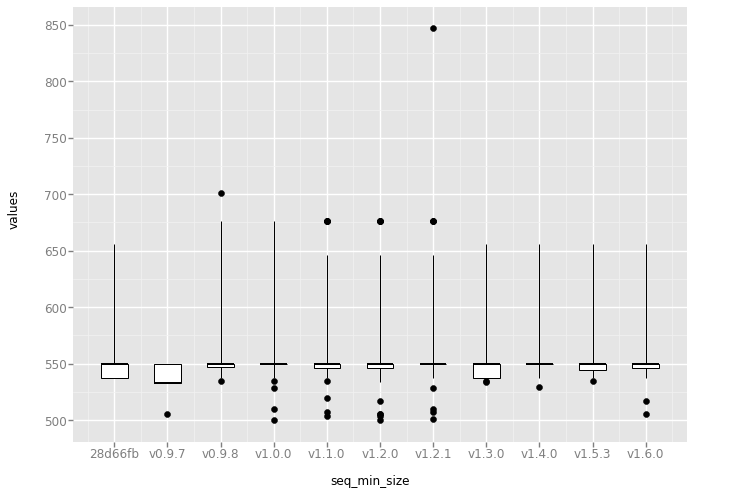

seq_max_size


,28d66fb,v0.9.7,v0.9.8,v1.0.0,v1.1.0,v1.2.0,v1.2.1,v1.3.0,v1.4.0,v1.5.3,v1.6.0
count,100.000000,99.000000,100.000000,100.000000,100.000000,100.00000,100.000000,99.000000,100.000000,100.000000,100.000000
mean,1518.820000,1517.696970,1526.330000,1526.790000,1526.440000,1526.20000,1526.630000,1518.454545,1519.730000,1519.500000,1519.280000
std,3.397504,5.596016,1.663968,2.371101,1.777071,2.70428,2.334004,3.764151,3.834598,3.865151,3.763407
min,1506.000000,1515.000000,1515.000000,1515.000000,1515.000000,1515.00000,1515.000000,1506.000000,1506.000000,1506.000000,1506.000000
25%,1515.000000,1515.000000,1526.000000,1526.000000,1526.000000,1526.00000,1526.000000,1515.000000,1515.000000,1515.000000,1515.000000
50%,1520.000000,1515.000000,1526.000000,1526.000000,1526.000000,1526.00000,1526.000000,1520.000000,1520.000000,1520.000000,1520.000000
75%,1520.000000,1515.000000,1526.000000,1527.000000,1526.000000,1526.00000,1526.000000,1520.000000,1522.000000,1520.000000,1520.000000
max,1525.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.00000,1530.000000,1525.000000,1526.000000,1525.000000,1525.000000


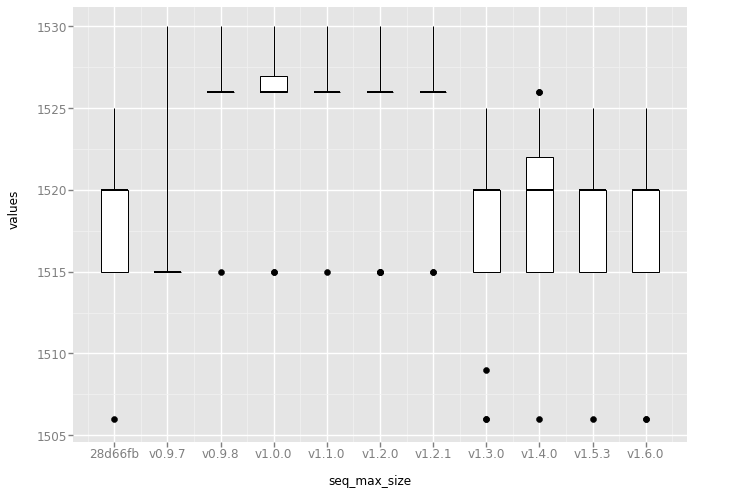

seq_avg_size


,28d66fb,v0.9.7,v0.9.8,v1.0.0,v1.1.0,v1.2.0,v1.2.1,v1.3.0,v1.4.0,v1.5.3,v1.6.0
count,100.00000,99.000000,100.000000,100.000000,100.000000,100.00000,100.000000,99.000000,100.000000,100.000000,100.000000
mean,1210.34710,1194.411111,1237.923300,1233.090400,1238.470800,1236.03990,1236.890200,1208.830101,1208.329800,1204.194100,1214.092400
std,33.62438,40.670067,36.111225,50.548135,44.709762,42.84074,45.115375,30.592306,32.080815,30.493803,30.904479
min,1133.08000,1147.000000,1156.040000,1142.770000,1133.240000,1148.96000,1147.880000,1112.850000,1118.360000,1100.580000,1135.790000
25%,1184.88000,1150.560000,1207.170000,1191.025000,1218.097500,1218.46500,1210.965000,1193.280000,1184.667500,1184.700000,1196.742500
50%,1202.46500,1187.040000,1243.700000,1239.090000,1239.090000,1239.09000,1239.090000,1200.090000,1199.920000,1199.380000,1205.480000
75%,1233.23250,1237.295000,1257.185000,1247.155000,1266.060000,1249.24500,1246.930000,1228.485000,1229.327500,1225.962500,1237.950000
max,1288.14000,1300.570000,1342.450000,1344.550000,1344.550000,1344.55000,1365.400000,1298.350000,1300.380000,1301.570000,1283.290000


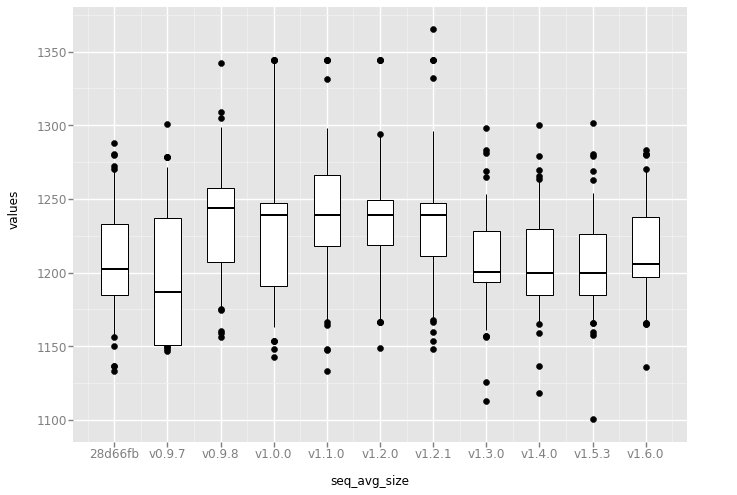

seq_total_size


,28d66fb,v0.9.7,v0.9.8,v1.0.0,v1.1.0,v1.2.0,v1.2.1,v1.3.0,v1.4.0,v1.5.3,v1.6.0
count,100.000000,99.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,100.000000,100.000000
mean,28236.230000,28208.797980,28368.100000,28128.440000,27879.690000,28087.350000,28111.940000,28192.767677,28217.160000,28144.740000,28351.390000
std,941.638105,816.088755,780.754084,911.352611,892.235856,876.622748,802.261939,1110.929183,1110.120129,966.945275,1041.436895
min,26187.000000,26161.000000,26409.000000,26278.000000,26668.000000,26533.000000,26640.000000,25967.000000,25715.000000,26106.000000,26473.000000
25%,27503.250000,27421.000000,27711.750000,27347.750000,27148.000000,27225.750000,27256.250000,27363.000000,27390.750000,27332.500000,27421.000000
50%,28355.000000,28470.000000,28605.000000,28074.500000,27803.000000,28257.000000,28491.500000,28225.000000,28286.000000,28246.000000,28496.000000
75%,28805.250000,28764.000000,28972.000000,28609.000000,28499.000000,28522.000000,28609.000000,28809.000000,28989.250000,28798.000000,29103.250000
max,30077.000000,29688.000000,30105.000000,30768.000000,29896.000000,29971.000000,29779.000000,31348.000000,30490.000000,30525.000000,30807.000000


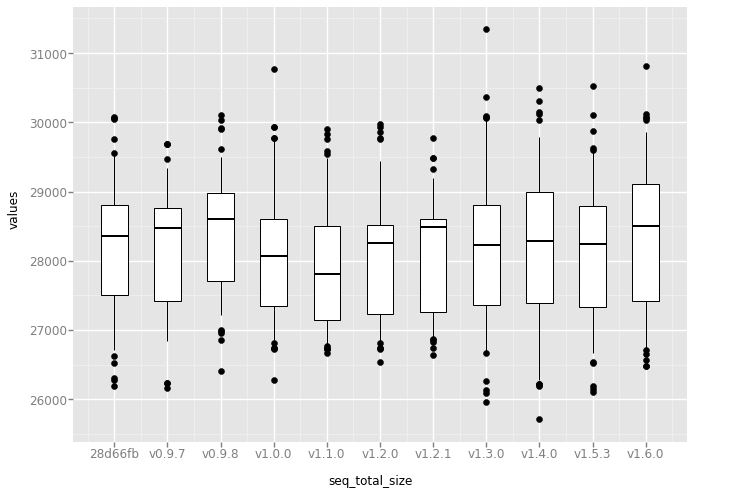

error_rate


,28d66fb,v0.9.7,v0.9.8,v1.0.0,v1.1.0,v1.2.0,v1.2.1,v1.3.0,v1.4.0,v1.5.3,v1.6.0
count,100.000000,99.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,100.000000,100.000000
mean,0.046000,0.087879,0.070500,0.058100,0.049400,0.052000,0.054600,0.048182,0.051000,0.047800,0.050400
std,0.030017,0.040236,0.036856,0.030967,0.028949,0.030715,0.031732,0.030784,0.031318,0.030734,0.032378
min,0.010000,0.030000,0.030000,0.020000,0.020000,0.020000,0.020000,0.010000,0.010000,0.010000,0.010000
25%,0.020000,0.040000,0.040000,0.030000,0.030000,0.030000,0.030000,0.020000,0.030000,0.027500,0.020000
50%,0.030000,0.100000,0.055000,0.040000,0.040000,0.040000,0.040000,0.030000,0.030000,0.030000,0.030000
75%,0.070000,0.130000,0.110000,0.090000,0.060000,0.080000,0.090000,0.080000,0.080000,0.080000,0.080000
max,0.130000,0.170000,0.180000,0.130000,0.160000,0.150000,0.160000,0.140000,0.170000,0.140000,0.150000


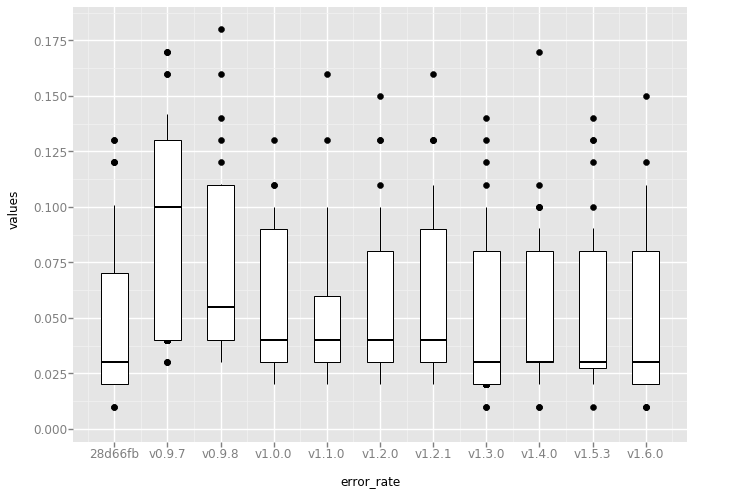

error_rate2


,28d66fb,v0.9.7,v0.9.8,v1.0.0,v1.1.0,v1.2.0,v1.2.1,v1.3.0,v1.4.0,v1.5.3,v1.6.0
count,100.000000,99.000000,100.000000,100.00000,100.000000,100.00000,100.000000,99.000000,100.000000,100.00000,100.000000
mean,0.034900,0.074545,0.057300,0.04120,0.039000,0.03960,0.037800,0.035758,0.032700,0.03350,0.038900
std,0.020375,0.042721,0.036065,0.02066,0.020768,0.02238,0.017672,0.022182,0.020093,0.01956,0.027373
min,0.010000,0.030000,0.020000,0.02000,0.020000,0.02000,0.020000,0.010000,0.010000,0.01000,0.010000
25%,0.020000,0.040000,0.030000,0.03000,0.027500,0.03000,0.030000,0.020000,0.020000,0.02000,0.020000
50%,0.030000,0.060000,0.040000,0.04000,0.030000,0.04000,0.040000,0.030000,0.030000,0.03000,0.030000
75%,0.032500,0.130000,0.100000,0.04000,0.040000,0.04000,0.040000,0.040000,0.030000,0.03000,0.032500
max,0.120000,0.170000,0.180000,0.13000,0.130000,0.15000,0.110000,0.120000,0.170000,0.14000,0.150000


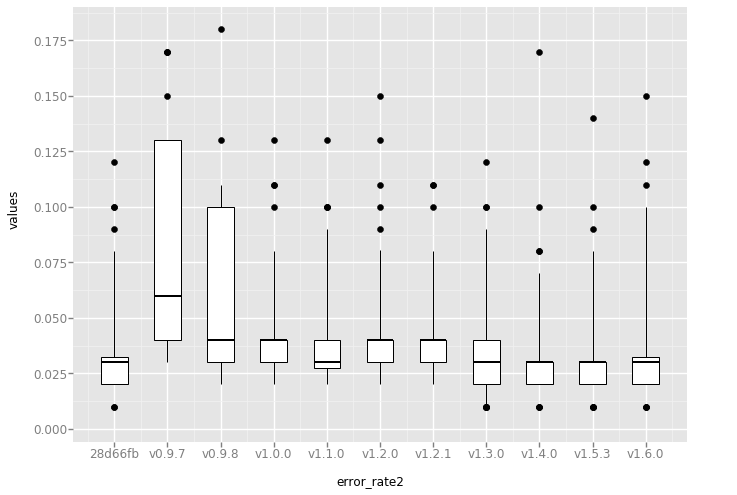

ref_coverage


,28d66fb,v0.9.7,v0.9.8,v1.0.0,v1.1.0,v1.2.0,v1.2.1,v1.3.0,v1.4.0,v1.5.3,v1.6.0
count,100.000000,99.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,100.000000,100.000000
mean,90.761000,91.617677,92.193400,91.491800,91.518400,91.523100,91.589100,90.622424,90.635600,90.680200,90.533600
std,1.216937,1.140590,1.138978,1.069827,0.898781,0.971199,0.813928,1.092619,1.031204,1.095532,1.324376
min,84.860000,88.000000,88.340000,88.140000,89.260000,87.770000,89.620000,87.050000,86.950000,86.300000,87.040000
25%,89.912500,91.735000,92.287500,90.665000,90.600000,90.690000,90.690000,89.810000,89.800000,89.950000,89.672500
50%,91.265000,91.890000,92.330000,91.960000,91.940000,91.950000,91.960000,91.170000,91.205000,91.220000,91.215000
75%,91.382500,92.470000,93.060000,92.172500,92.060000,92.060000,92.132500,91.295000,91.340000,91.340000,91.347500
max,92.510000,93.260000,93.820000,95.720000,92.830000,92.800000,92.960000,92.190000,92.190000,92.450000,95.060000


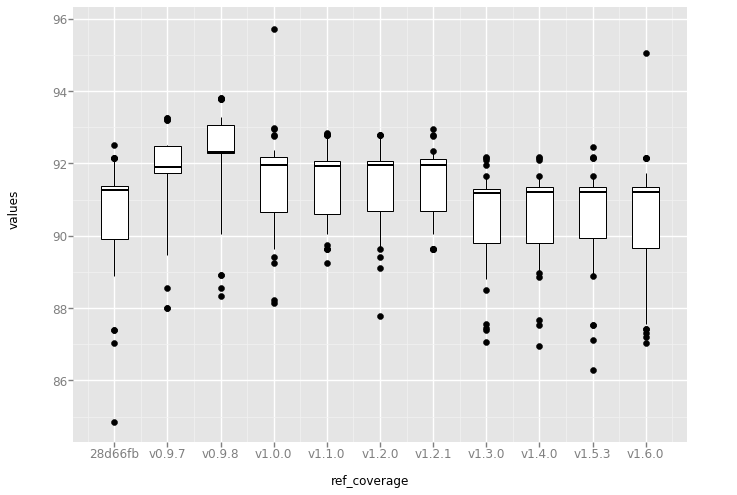

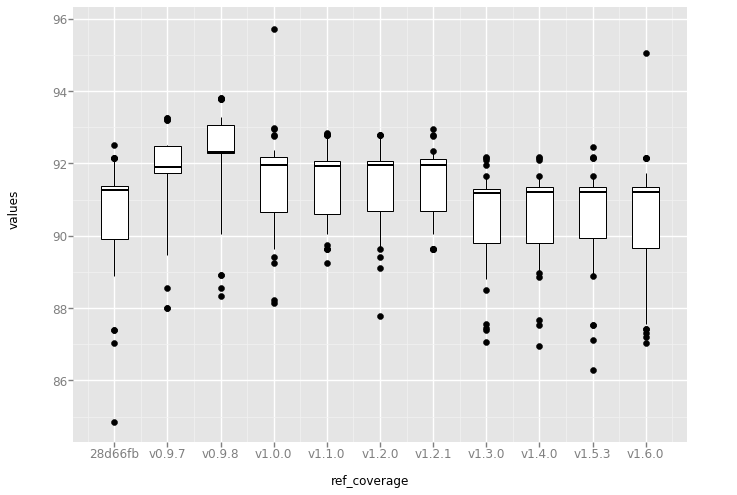

In [84]:
%matplotlib inline
from ggplot import ggplot, aes, geom_boxplot
import datetime
#import matplotlib.pyplot as plt

timestamp = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
pdf = os.path.join(results_dir, "%s.pdf" % timestamp)


for i, c in enumerate(categories):
    print(c)
    dict_to_plot = {}
    for revision in revisions_df.keys():
        dict_to_plot[revision] = revisions_df[revision][c]
    df = pd.DataFrame(dict_to_plot)
    display(df.describe())
    p = ggplot(pd.melt(df, var_name=c, value_name='values'), aes( x = c, y = 'values')) + geom_boxplot()
    p.show()
    p.save('%s_matam_boxplot.svg' % i)

#convert all svg in one pdf file & remove the svg files
! convert ?_matam_boxplot.svg {pdf}
! rm ?_matam_boxplot.svg